In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Get data from google drive
import google

**From google colab import drive. This is used to mount the drive in-order to faciliate reading data**

In [0]:
from google.colab import drive

In [4]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**List all the files present in the drive**

In [5]:
!ls -all './drive/My Drive/'

total 37
drwx------ 2 root root 4096 Jan  6  2015 '104___12 Engagement photos'
-rw------- 1 root root    1 Feb 10  2018  50_Startups.gsheet
drwx------ 2 root root 4096 Oct  6 06:59 'Colab Notebooks'
drwx------ 2 root root 4096 Nov  3 02:11  Computer_Vision
drwx------ 2 root root 4096 Nov 25 11:30  Computer_Vision_Dog_Breed_Identification
drwx------ 2 root root 4096 May  7  2015 'Engagement album'
drwx------ 2 root root 4096 May  7  2015 'Engagement Album 2'
drwx------ 2 root root 4096 Feb  7  2015 'Perungulathur registration video'
drwx------ 2 root root 4096 Jan  6  2015 'Smart phone captures Engagement'
drwx------ 2 root root 4096 Nov 24 10:35  SVHN_neural_network_dataset


**List all the files present within the folder of importance - Computer_Vision_Dog_Breed_Identification**

In [6]:
!ls -all './drive/My Drive/Computer_Vision_Dog_Breed_Identification'

total 50170
-rw------- 1 root root   482063 Nov 25 09:36 'Copy of labels.csv'
-rw------- 1 root root 25200295 Nov 25 09:36 'Copy of sample_submission.csv'
-rw------- 1 root root   482063 Nov 18 05:57  labels.csv
-rw------- 1 root root 25200295 Nov 18 05:57  sample_submission.csv
drwx------ 2 root root     4096 Nov 18 06:20  test
drwx------ 2 root root     4096 Nov 18 08:08  train


In [0]:
#Read labels.csv
labels = pd.read_csv("./drive/My Drive/Computer_Vision_Dog_Breed_Identification/labels.csv")

In [8]:
labels.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
#This is used to perform directory level manipulations of data.
import os

**The os.path.join is used to join multiple entries into a path and use it to read a file from that joined path.**

**For example: os.path.join("a", "b") will create a path as /a/b**

In [0]:
drivepath = './drive/My Drive/Computer_Vision_Dog_Breed_Identification'
sampleSubmission = pd.read_csv(os.path.join(drivepath, 'sample_submission.csv'))

In [11]:
print(len(sampleSubmission))
print(len(labels))

10357
10222


In [13]:
#Let us read data from train and test folder and print the total number of data available in each folder
#We will use listdir function from os.path to do the same
!ls -all './drive/My Drive/Computer_Vision_Dog_Breed_Identification'

total 50170
-rw------- 1 root root   482063 Nov 25 09:36 'Copy of labels.csv'
-rw------- 1 root root 25200295 Nov 25 09:36 'Copy of sample_submission.csv'
-rw------- 1 root root   482063 Nov 18 05:57  labels.csv
-rw------- 1 root root 25200295 Nov 18 05:57  sample_submission.csv
drwx------ 2 root root     4096 Nov 18 06:20  test
drwx------ 2 root root     4096 Nov 18 08:08  train


In [14]:
#Let us find the total number of items under test and train folder
TotalItems_Test = len(os.listdir(os.path.join(drivepath, 'test')))
print("Total number of items present in test folder is ",TotalItems_Test)
TotalItems_Train = len(os.listdir(os.path.join(drivepath, 'train')))
print("Total number of items present in train folder is ", TotalItems_Train)

Total number of items present in test folder is  10357
Total number of items present in train folder is  10222


In [15]:
#Let us check for the top 16 most occuring dog breeds
top16DogbreedsDF = labels.groupby('breed').count().sort_values(by='id', ascending=False).head(16)
top16DogbreedsDF

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [0]:
sampleDogToDisplay = np.random.choice(TotalItems_Train, 1, replace=False)

843d766d92a7b6d6a85a81e56a99c51f.jpg


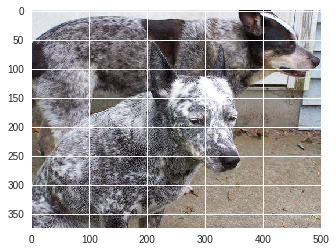

In [17]:
#Let us print a sample dog image
import matplotlib.image as mpimg
for ids in sampleDogToDisplay:
  fileName = os.listdir(os.path.join(drivepath, 'train'))[ids]
  print(fileName)
  fileLocation = os.path.join(drivepath, 'train', fileName)
  img=mpimg.imread(fileLocation)
  imgplot = plt.imshow(img)

Let us check the size of images in training set. We might need to regularize the size of the images.
Even though CNNs do well with varying image sizes due to a concept called  translation invariance; basically, the same feature carries equal importance at different points in the input space.
Even though CNN works best, for the sake of efficiency of TPUs and GPUs involved in executing the code, it is best to regularize the size of each image.

**Source** : https://djsaunde.wordpress.com/2017/11/29/kaggles-dog-breed-identification-competition-part-i-data-exploration/

**More on Translational Invariance**: https://stats.stackexchange.com/questions/208936/what-is-translation-invariance-in-computer-vision-and-convolutional-neural-netwo


In [0]:
#Let us initialize minimum width and height to negative infinity and maximum width and height to positive infinity
widths, heights = [], []
minwidth, maxwidth = np.NINF, np.PINF
minheight, maxheight = np.NINF, np.PINF

**Let us import PIL - Python Image Library for calculating the height and width of every file available in the training data set**

In [0]:
import PIL

In [0]:
for fileName in os.listdir(os.path.join(drivepath, 'train')):
  image = PIL.Image.open(os.path.join(drivepath, 'train', fileName))
  widths.append(image.size[0])
  heights.append(image.size[1])

In [21]:
print("------------------------------TRAINING DATA IMAGES STATISTICS----------------------------")
print("Training data Average width and heights are ", (np.mean(widths), np.mean(heights)))
print("Training data Mimimum and maximum width of images are ", (np.min(widths), np.max(widths)))
print("Training data Minimum and maximum heights of images are ", (np.min(heights), np.max(heights)))
print("Training data Standard deviation of width and height is ",(np.std(widths), np.std(heights)))


------------------------------TRAINING DATA IMAGES STATISTICS----------------------------
Training data Average width and heights are  (443.33153981608297, 386.74721189591077)
Training data Mimimum and maximum width of images are  (97, 3264)
Training data Minimum and maximum heights of images are  (102, 2562)
Training data Standard deviation of width and height is  (152.4126640844155, 130.06196422027517)


**PLOTTING STATISTICS DATA FOR TRAINING SET:**

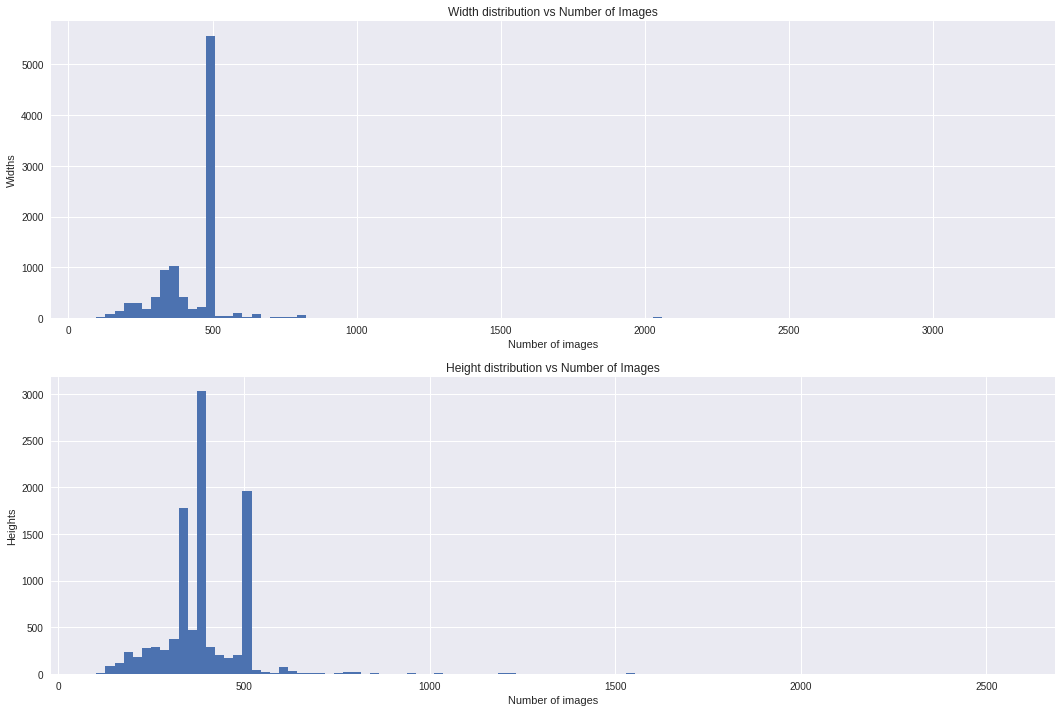

In [22]:
#Let us plot the statistics
fig, (ax1, ax2) = plt.subplots(2, figsize=(18, 12))
ax1.hist(widths, bins=100)
ax1.set_title("Width distribution vs Number of Images")
ax1.set_ylabel("Widths")
ax1.set_xlabel("Number of images")
ax2.hist(heights, bins=100)
ax2.set_title("Height distribution vs Number of Images")
ax2.set_ylabel("Heights")
ax2.set_xlabel("Number of images")
plt.show()

Looking at the statistics above and the graphs we can deduce that most of the images are found around the mean of width and height. We can deduce that most of the images are of similar sizes

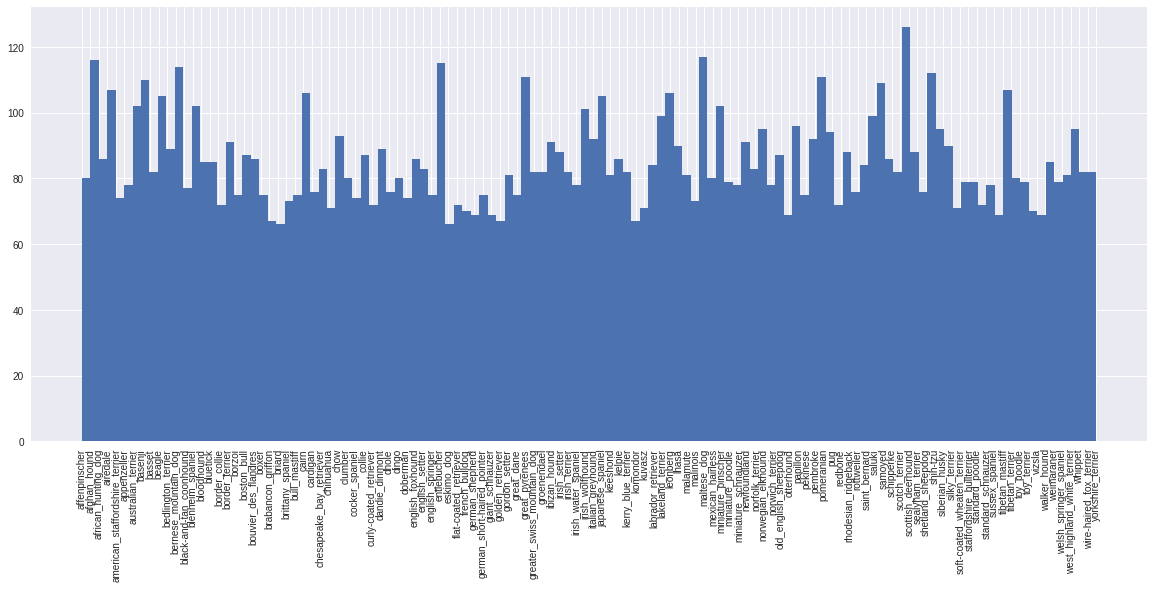

In [23]:
#Let us plot the breed histogram
labels['breed'].hist(figsize=(20, 8), bins=120, xrot=90)

Looking at the plot above, we can decide that almost all of the given breeds appear more than 60 times but less than 130 times. We can infer that for breeds hovering around 130 can give us better accuracy whereas the breeds around 60 might give a lesser accuracy comparitively

**Let us now convert each image into a numpy nd array with three dimensions.**
1. Width
2. Height
3. Depth.

**So this indicates that our X Train, X Test and X valid will have four dimensions .**

1. Number of samples, 
2. Width of each sample, 
3. Height of each sample and 
4. Depth of each sample

In [0]:
#The below method will resize each image and convert the same them into numpy array.
def convert_image(id, train = True, image_size=(128, 128)):
  if train:
    image = PIL.Image.open(os.path.join(drivepath, 'train', '%s.jpg' %id))
  else:
    image = PIL.Image.open(os.path.join(drivepath, 'test', '%s.jpg' %id))
  
  image = np.array(image.resize(image_size))
  return image

In [0]:
#This helps in converting each image into np array
X_train = np.array([ convert_image(Id.split('.')[0])for Id in sorted(os.listdir(os.path.join(drivepath, 'train')))])

In [26]:
print("Shape of X Train is ", X_train.shape)

Shape of X Train is  (10222, 128, 128, 3)


**Since there is no validation set provided, let us split the training set into training and validation set in the ratio 75:25**

In [0]:
X_train, X_valid = X_train[:int(0.75*(len(X_train)))], X_train[int(0.75*(len(X_train))):]

In [28]:
#Let us print the shape of X_train and X_valid
print("Shape of X_train is ", X_train.shape)
print("Shape of X_valid is ", X_valid.shape)

Shape of X_train is  (7666, 128, 128, 3)
Shape of X_valid is  (2556, 128, 128, 3)


In [29]:
breeds = sorted(labels.breed.unique())
len(breeds)

120

In [0]:
breed_map = {breed: idx for idx, breed in enumerate(breeds)}

In [0]:
#Need to check extensively how this works
y_train = np.array([breed_map[labels[labels['id'] == \
                                     ID.split('.')[0]]['breed'].tolist()[0]] for 
                    ID in sorted(os.listdir(os.path.join(drivepath, 'train')))])

In [0]:
#Convert y_train to y_train and y_valid
y_train, y_valid = y_train[:int(0.75*(len(y_train)))], y_train[int(0.75*(len(y_train))):]

In [33]:
print("Shape of y_train ", y_train.shape)
print("Shape of y_valid ", y_valid.shape)
print("Sample values from y train and y valid are %s and %s" %(y_train[34], y_valid[34]))

Shape of y_train  (7666,)
Shape of y_valid  (2556,)
Sample values from y train and y valid are 113 and 57


At this stage, we should have X_train, X_valid, y_train and y_valid available to be passed into CNN model. Let us print the shape of all four parameters below

In [34]:
print("----------------------SHAPE STATISTICS FOR TRAINING AND VALIDATION SETS----------------------")
print("Shape of X_train is ",X_train.shape)
print("Shape of y_train is ",y_train.shape)
print("Shape of X_valid is ",X_valid.shape)
print("Shape of y_valid is ",y_valid.shape)

----------------------SHAPE STATISTICS FOR TRAINING AND VALIDATION SETS----------------------
Shape of X_train is  (7666, 128, 128, 3)
Shape of y_train is  (7666,)
Shape of X_valid is  (2556, 128, 128, 3)
Shape of y_valid is  (2556,)


**Converting the test images to pre-processed images as numpy arrays in four dimensions (number of samples, height, width, depth)**

In [0]:
#This helps in converting each image into np array
X_test = np.array([ convert_image(Id.split('.')[0], train = False)for Id in sorted(os.listdir(os.path.join(drivepath, 'test')))])

In [36]:
print("Shape of X_test is ", X_test.shape)

Shape of X_test is  (10357, 128, 128, 3)


**Let us start implementing CNN. **

Data at hand right now:  X_train, X_valid, y_train, y_valid and X_test

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

Using TensorFlow backend.


In [0]:
IMG_SIZE = 128
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(120, activation = 'softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [40]:
y_train = keras.utils.to_categorical(y_train, num_classes=120)
y_valid = keras.utils.to_categorical(y_valid, num_classes=120)
print("Shape of y_train ",y_train.shape)
print("Shape of y_valid ", y_valid.shape)

Shape of y_train  (7666, 120)
Shape of y_valid  (2556, 120)


In [41]:
model.fit(x=X_train, y=y_train, batch_size=50, epochs=5, verbose=1, validation_data=(X_valid, y_valid))

Train on 7666 samples, validate on 2556 samples
Epoch 1/5
7666/7666 [==============================] - 400s 52ms/step - loss: 6.1038 - acc: 0.0185 - val_loss: 4.9637 - val_acc: 0.0172
Epoch 2/5
7666/7666 [==============================] - 398s 52ms/step - loss: 4.1672 - acc: 0.1259 - val_loss: 5.0808 - val_acc: 0.0196
Epoch 3/5
7666/7666 [==============================] - 399s 52ms/step - loss: 2.5130 - acc: 0.4216 - val_loss: 5.9696 - val_acc: 0.0430
Epoch 4/5
7666/7666 [==============================] - 400s 52ms/step - loss: 0.9236 - acc: 0.7759 - val_loss: 6.0886 - val_acc: 0.0466
Epoch 5/5
7666/7666 [==============================] - 398s 52ms/step - loss: 0.1923 - acc: 0.9605 - val_loss: 7.0257 - val_acc: 0.0501


In [0]:
y_predict = model.predict(X_test)

At this stage we have deduced that the model produces a traning accuracy of 96.05% and validation accuracy of 50.1%.

The next step was model.predict to predict the model output by passing the X_test values as parameters. These predicted values are stored in y_predict

The required output is a CSV file with the values assigned to each dog breed for the given input. So ideally the output file should be having an Id column and 120 columns with values for that Id column. Id column has nothing but the dog breed name

In [0]:
columnNames = []
breedInfo = labels['breed']
for breed in breedInfo:
  if breed not in columnNames:
    columnNames.append(breed)

In [0]:

submissionDF = pd.DataFrame(data = y_predict, columns = columnNames)

In [58]:
submissionDF.head(3)

,boston_bull,dingo,pekinese,bluetick,golden_retriever,bedlington_terrier,borzoi,basenji,scottish_deerhound,shetland_sheepdog,...,blenheim_spaniel,silky_terrier,sussex_spaniel,german_short-haired_pointer,french_bulldog,bouvier_des_flandres,tibetan_mastiff,english_springer,cocker_spaniel,rottweiler
0,2.422851e-07,0.000034,6.414596e-07,3.018131e-03,4.750885e-03,7.117521e-06,0.000096,0.000026,5.879121e-05,0.003416,...,1.205470e-03,0.000084,2.457800e-04,0.001610,0.000277,1.598762e-02,0.000311,2.929798e-03,3.332792e-02,0.000002
1,6.003121e-10,0.000025,4.128896e-10,5.792434e-07,8.138451e-08,3.136408e-08,0.001663,0.186630,1.064132e-10,0.000001,...,1.601141e-07,0.033616,6.837618e-09,0.157299,0.000026,3.805559e-07,0.001794,8.840370e-09,2.249191e-07,0.002305
2,3.118319e-06,0.000217,8.634053e-08,8.330264e-04,1.122353e-05,1.675280e-05,0.000004,0.000092,6.148865e-05,0.000129,...,2.303364e-06,0.001505,3.079630e-04,0.000017,0.000172,1.771683e-04,0.000075,4.641221e-04,3.096763e-05,0.000008


From above result, we can infer that the dataframe has 120 columns with values in each of them indicating how much a particular row belongs to a breed. Let us proceed to add a new Id column with Id of the breed. We will extract the Id column from sampleSubmission.csv and add the same into the submissionDF dataframe that we have created from y_predict.

In [0]:
submissionDF.insert(loc=0, column='id', value=sampleSubmission['id'])

In [61]:
submissionDF.sample(4)

,id,boston_bull,dingo,pekinese,bluetick,golden_retriever,bedlington_terrier,borzoi,basenji,scottish_deerhound,...,blenheim_spaniel,silky_terrier,sussex_spaniel,german_short-haired_pointer,french_bulldog,bouvier_des_flandres,tibetan_mastiff,english_springer,cocker_spaniel,rottweiler
4181,6619715f0920559fc927310d17d565f9,0.006532,0.000017,1.032413e-08,0.000220,1.735592e-04,1.430853e-05,0.000104,0.000039,0.000030,...,0.001820,9.936740e-05,5.353284e-08,5.150103e-02,1.460444e-05,0.001476,1.284553e-03,0.000716,1.333744e-02,1.995914e-03
2361,3883230e770164d378f4e133a2557dad,0.000005,0.003703,6.033625e-05,0.000861,3.970855e-07,2.125117e-07,0.000140,0.001826,0.000077,...,0.000020,7.867818e-08,2.177360e-04,6.716851e-08,4.983941e-07,0.000401,1.485911e-05,0.000011,5.449374e-08,9.256706e-07
7897,c32cabdd09f78fec607f799306845cfb,0.000103,0.000065,9.659413e-04,0.002376,9.498641e-04,2.606695e-08,0.052489,0.594684,0.000005,...,0.000206,5.249849e-06,5.019029e-04,1.292856e-08,1.060929e-04,0.000004,5.668204e-07,0.000008,8.365969e-04,2.909084e-05
7595,bb5dccafefdac840935697a0f648fd72,0.000134,0.000054,1.633366e-03,0.000005,5.620008e-04,5.019366e-05,0.000029,0.008887,0.009938,...,0.000262,3.435654e-02,1.114724e-03,1.958157e-04,2.223145e-02,0.000982,1.767693e-03,0.010798,2.776899e-04,1.200011e-01


Now that the final DF is ready let us go ahead and create the resultant csv that is asked for.  We will use pd.to_csv to convert the dataframe to csv file. This csv file will be saved in the same location as sampleSubmission.csv and the name is DogBreedResult.csv.

The below step is used to save the result as a csv file and this file will be used as the final submission into GITHUB.

In [0]:
  submissionDF.to_csv(os.path.join(drivepath, 'DogBreedResult.csv'), index=False)